# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [136]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

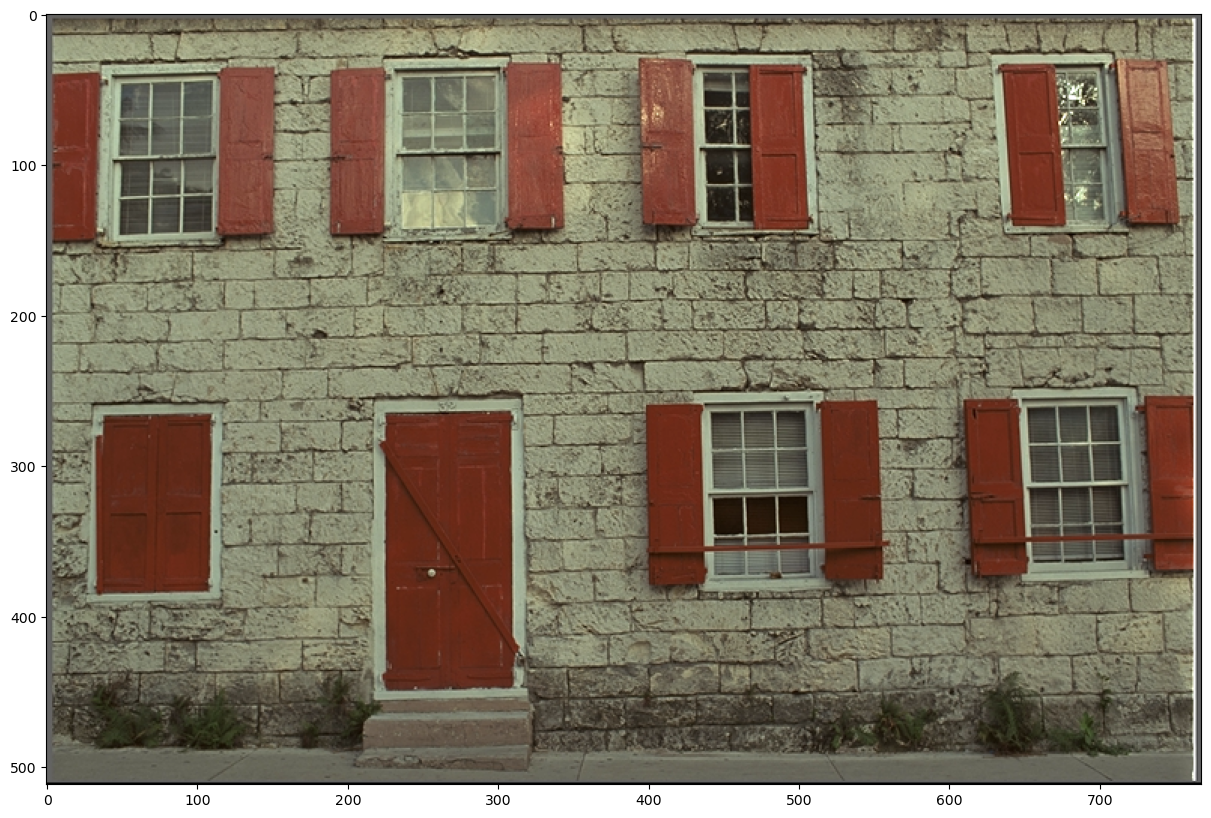

In [137]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255
plt.imshow(img)

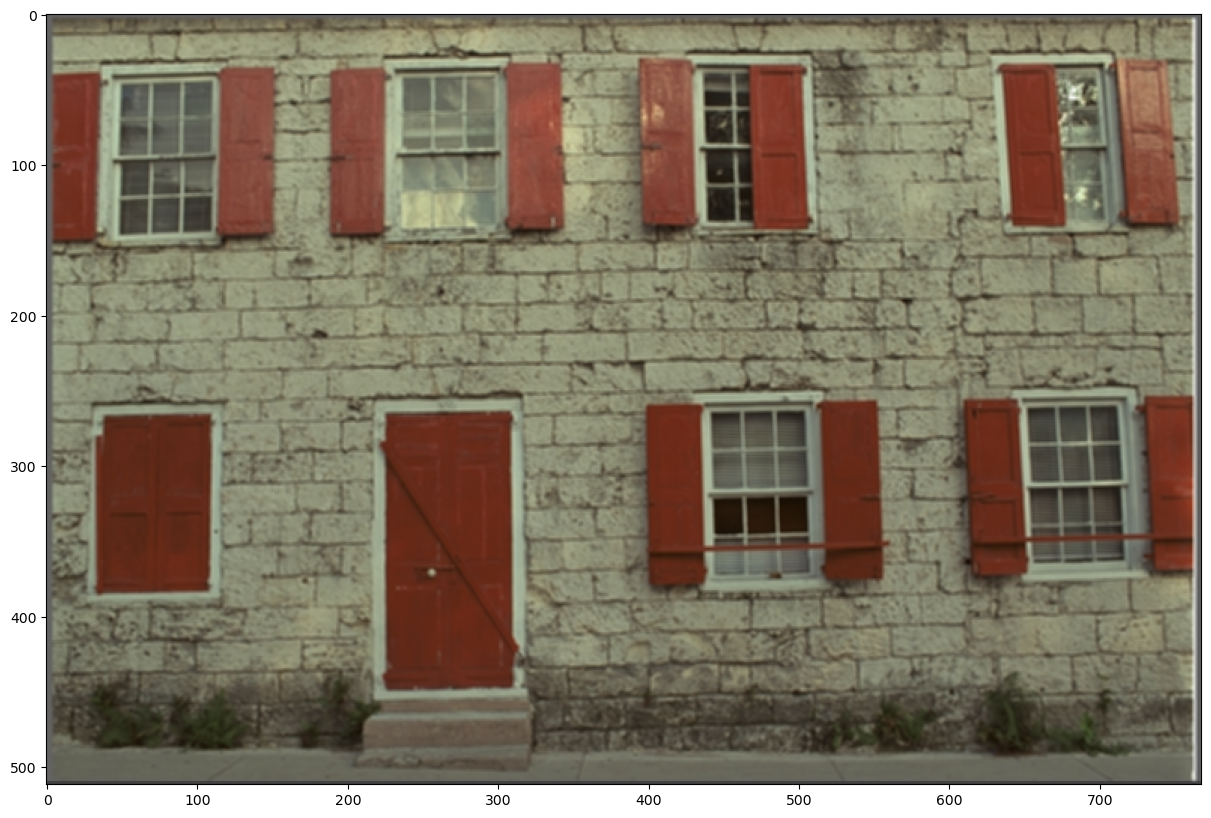

In [142]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
def blur_image(image, sigma_x):
  return cv2.GaussianBlur(image, ksize = (3, 3), sigmaX = sigma_x)

unsharp = blur_image(img, 3)

plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


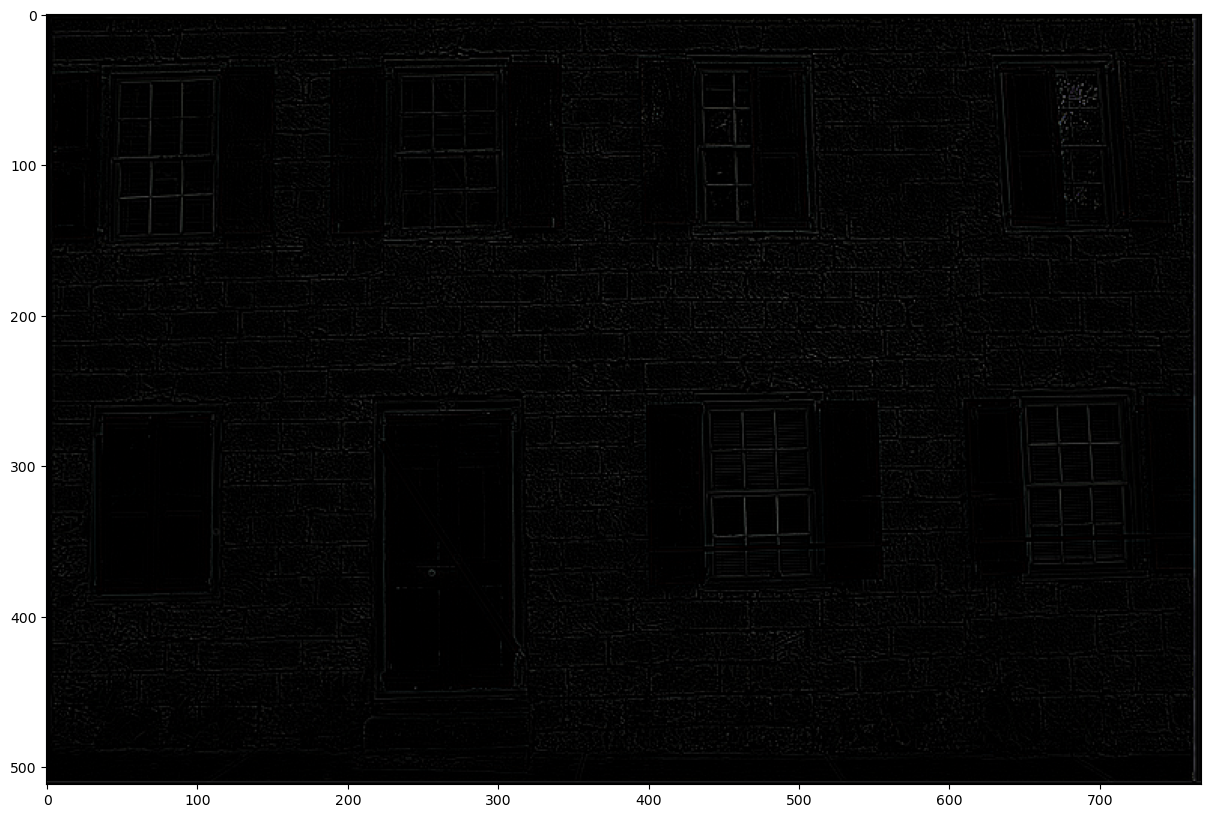

In [145]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

diff = img - unsharp
plt.imshow(diff)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


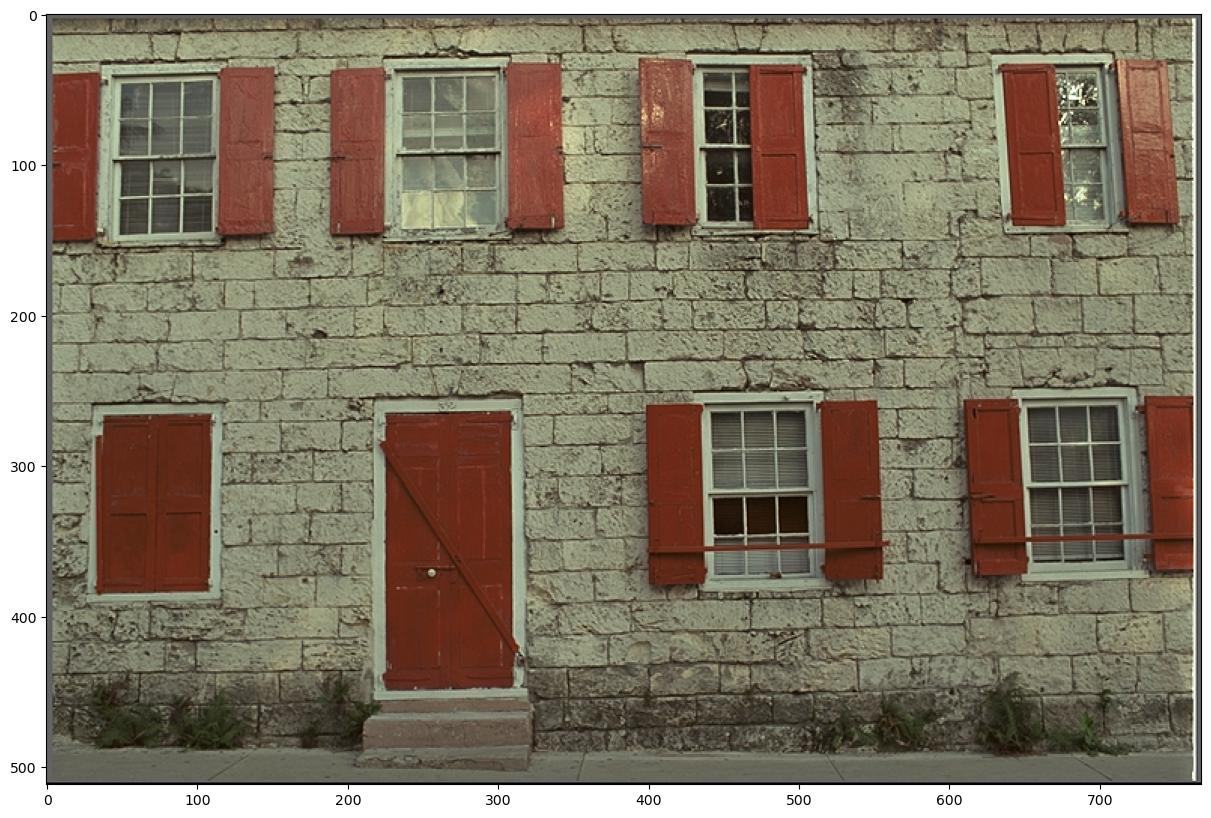

In [146]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

def sharp_image(original, blurred, amount):
  return original + (original - blurred) * amount

sharpened = sharp_image(img, unsharp, 0.2)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
  * It completely depends on concrete image and final goal of using this image, posting in internet or printing in a newspaper etc.
* What happens if it is too small?
  * The lower the 'amount', the less sharpened image become. Better to use for an images with many small details.
* What happens if it is too large?
  * The bigger the 'amount', the more sharpened image become. Better to use for an images with large objects.